## 1. Import Libraries

In [39]:
import matplotlib.pyplot as plt
import pandas as pd 

## 2. Load Data

In [3]:
# load data 
df = pd.read_csv("../dataset/DatasetWithTagFinal.csv")

In [5]:
# Check 5 top data
df.head()

,sentence,kata,tag
0,Kalimat 1,forza,B-Game
1,Kalimat 1,horizon,E-Game
2,Kalimat 1,om,O
3,Kalimat 1,sekali,O
4,Kalimat 1,install,B-Request


In [6]:
# Check 5 bottom data
df.tail()

,sentence,kata,tag
8931,Kalimat 1390,mau,O
8932,Kalimat 1390,ubah,B-Request
8933,Kalimat 1390,min,O
8934,Kalimat 1391,ready,B-Ketersediaan
8935,Kalimat 1391,gan,O


In [7]:
# Check column detail 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  8936 non-null   object
 1   kata      8936 non-null   object
 2   tag       8936 non-null   object
dtypes: object(3)
memory usage: 209.6+ KB


These are information detail per column: 
- sentence = sentence question from discussion 
- kata = part of kata from sentence 
- tag = tag / label from kata and sentence

In [12]:
# Check missing value
df.isnull().sum()

sentence    0
kata        0
tag         0
dtype: int64

## 3. Visualization

### 3.1 Top 5 word tag in discussion

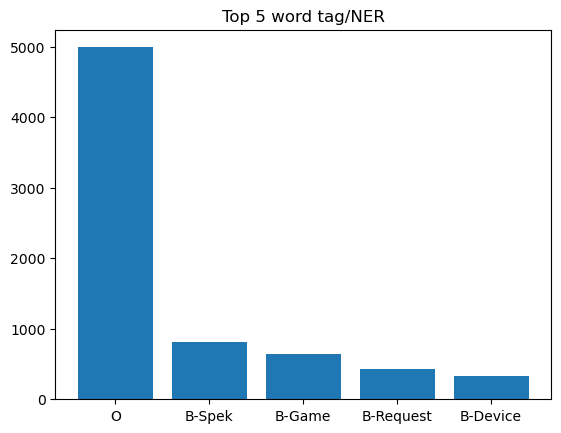

In [123]:
data = pd.DataFrame(df[(df['tag'].str[0] == 'B' ) | (df['tag'].str[0] == 'O')].groupby(['tag']).size().sort_values(ascending=False).iloc[0:5])
x = data.index.to_list()
y = data.values.ravel()

# y
plt.bar(x,y)
plt.title("Top 5 word tag/NER")
plt.show()
# groupby('tag').size().sort_values(ascending=False)

### 3.2 Top 5 Specs that people ask about the most

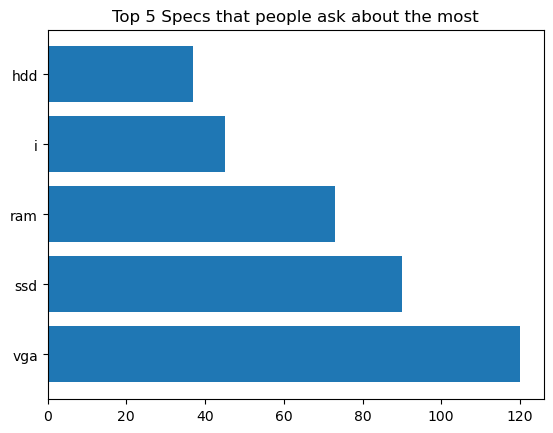

In [101]:
data = pd.DataFrame(df[df['tag'] == 'B-Spek'][['kata','tag']].groupby('kata').count().sort_values(by='tag',ascending=False)).iloc[0:5]

labels = data.index.to_list()
y = data.values.ravel()

plt.barh(labels,y)
plt.title("Top 5 Specs that people ask about the most")
plt.show()

### 3.3 Top 5 Game that people ask about the most

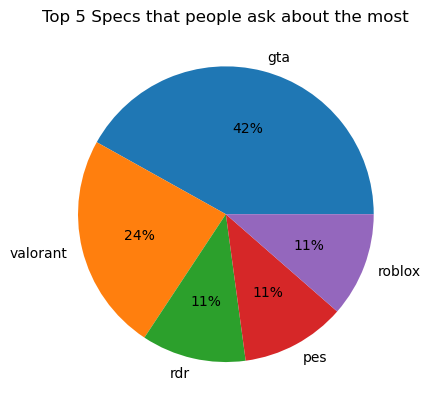

In [102]:
data = pd.DataFrame(df[df['tag'] == 'B-Game'][['kata','tag']].groupby('kata').count().sort_values(by='tag',ascending=False)).loc[['gta','valorant','rdr','pes','roblox']]

labels = data.index.to_list()
y = data.values.ravel()

plt.pie(y,labels=labels,autopct='%1.0f%%')
plt.title("Top 5 Game that people ask about the most")
plt.show()

### 3.4 Top 5 Device that people ask about the most

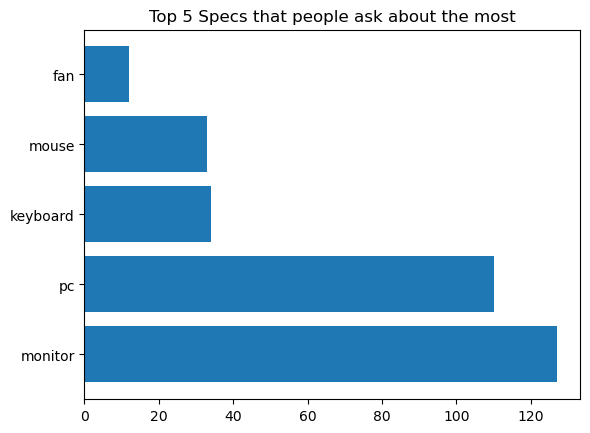

In [105]:
data = pd.DataFrame(df[df['tag'] == 'B-Device'][['kata','tag']].groupby('kata').count().sort_values(by='tag',ascending=False)).iloc[0:5]


labels = data.index.to_list()
y = data.values.ravel()

plt.barh(labels,y)
plt.title("Top 5 Specs that people ask about the most")
plt.show()

### 3.5 Top 5 Activity that people ask about the most

In [ ]:
df.loc[df['kata'] == 'desain','kata'] = 'design'
df.loc[df['kata'] == 'editing','kata'] = 'edit'
df.loc[df['kata'] == 'rander','kata'] = 'render'
df.loc[df['kata'] == 'live','kata'] = 'livestream'

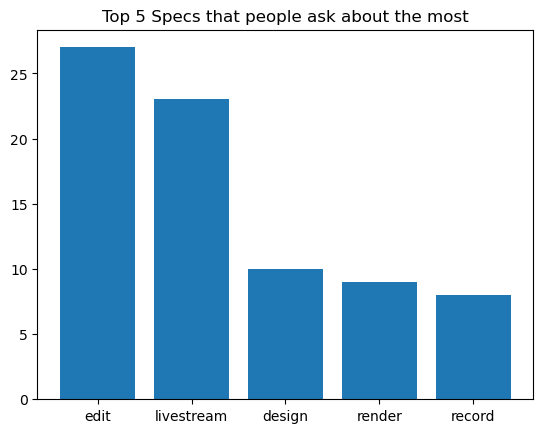

In [122]:
data = pd.DataFrame(df[df['tag'] == 'B-Kegiatan'][['kata','tag']].groupby('kata').count().sort_values(by='tag',ascending=False)).iloc[0:5]

labels = data.index.to_list()
y = data.values.ravel()

plt.bar(labels,y)
plt.title("Top 5 Specs that people ask about the most")
plt.show()